<a href="https://colab.research.google.com/github/kotiksrex/Numpy-and-Pandas/blob/project_stats_model/%D0%BC%D0%B0%D1%82%D1%81%D1%82%D0%B0%D1%82_%D0%BA%D1%83%D1%80%D1%81%D0%B0%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Цель - изучить изменчивость репродуктивной функции модельного вида животного (рыжая полевка) при действии 2-х факторов:
1. Условия обитания: фоновый район (условно чистый) и териитория естесвенной геохимической аномалии с избыточным почвенным содержанием тяжелых металлов в 2-х повторностях (у1 и у2).
2. Фаза численности популяции: рост (фаза нарастания численности популяции) и пик (фаза максимальной численности популяции). 
Степень проявления механизма авторегуляции численности зависит от условий обитания популяции и положения в ареале (Hansson, Henttonen, 1985; Ivanter, Osipova, 2000; Ивантер, 2005). У рыжей полевки в оптимуме ее видового ареала при высокой численности популяции, превышающей пороговые значения, включаются механизмы плотностно-зависимой регуляции (Жигальский, Бернштейн, 1986; 1989; Жигальский, 1994).  В коренных южно-таежных темнохвойных лесах Среднего Урала (Висимский государственный природный биосферный заповедник, который может служить фоновой территорией в геохимическом отношении) у рыжей полевки установлен трехлетний популяционный цикл с чередованием трех фаз: депрессия, рост, пик (Жигальский, Кшнясев, 2000; Кшнясев, Давыдова, 2005).

Показатель (целевая переменная)
ДСК-диаметр семенных канальцев. Известно, что интенсивность сперматогенеза самцов имеен положительную корреляцию с диаметрами семенных канальцев (место образования и созревания сперматозоидов в семенниках животных). 

In [1]:
import pandas as pd

In [2]:
diametr = pd.read_excel('ДСК_диспер_база.xlsx')
diametr.head()

,фаза,район,ДСК
0,рост,фон,164.8
1,рост,фон,178.9
2,рост,фон,195.9
3,рост,фон,166.5
4,рост,фон,162.3


In [3]:
import seaborn as sns


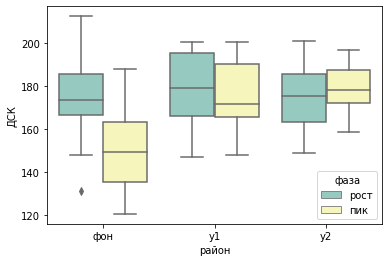

In [4]:
sns.boxplot(x="район", y="ДСК", hue="фаза", data=diametr, palette="Set3") 

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('ДСК ~ C(фаза) + C(район) + C(фаза):C(район)', data=diametr).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(фаза),4488.925102,1.0,17.084172,0.000068
C(район),4892.389594,2.0,9.309849,0.000177
C(фаза):C(район),5598.007027,2.0,10.652585,0.000056
Residual,30742.152945,117.0,NaN,NaN


In [6]:
pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.2 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=3945429479c480ce83024fa77fbbc31aba7ac0dfb2f11a0a2d85d1c3718714f7
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=066ab5faf4196934648bfcb4e5388ffa5059004b73524aec3d242f63c15c1294
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [7]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=diametr, res_var='ДСК', xfac_var=['фаза','район'], anova_model='ДСК ~ C(фаза) + C(район) + C(фаза):C(район)')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:369: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(рост, фон)","(рост, у1)",2.453445,-11.431338,16.338228,0.724059,0.900
1,"(рост, фон)","(рост, у2)",1.357143,-13.137291,15.851577,0.383673,0.900
2,"(рост, фон)","(пик, фон)",26.287976,13.840472,38.735480,8.653894,0.001
3,"(рост, фон)","(пик, у1)",0.864202,-13.020581,14.748985,0.255043,0.900
4,"(рост, фон)","(пик, у2)",3.182857,-11.311577,17.677291,0.899814,0.900
5,"(рост, у1)","(рост, у2)",3.810588,-12.827400,20.448576,0.938486,0.900
6,"(рост, у1)","(пик, фон)",28.741422,13.852688,43.630155,7.910195,0.001
7,"(рост, у1)","(пик, у1)",3.317647,-12.792016,19.427310,0.843879,0.900
8,"(рост, у1)","(пик, у2)",0.729412,-15.908576,17.367400,0.179642,0.900
9,"(рост, у2)","(пик, фон)",24.930833,9.471991,40.389675,6.608403,0.001


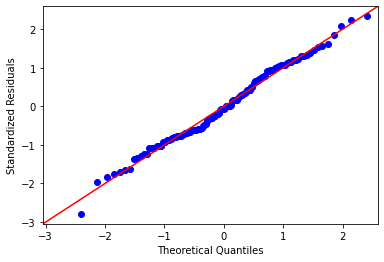

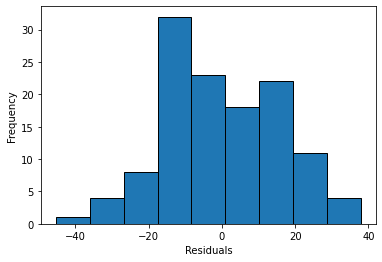

In [8]:
# Проверка на нормальность распределения
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

**Основные выводы:**
Целевая переменная имеет распределение близкое к нормальному, поэтому применение дисперсионного анализа допустимо.
На диаметр семенных канальцев статистически значимо влияет фаза цикла (F =17.08; p <0.001), район (F = 9.3; p <0.001) и взаимодейст-вие этих факторов (F = 10.65; p <0.001). При пике численности у животных с фоновой территории диаметр семенных канальцев значимо меньше, чем при росте численности (p=0.001; Тест Тьюки HSD), на аномальных территориях – значимо больше по сравнению с фоновым участком (p=0.001; Тест Тьюки HSD). На фоновом и аномальных участках при росте численности популяции практически у всех животных диаметр семенных канальцев соответствует активному сперматогенезу.

ДСК-диаметр семенных канальцев
ПЯЛ - площадь ядер клеток Лейдига
ПЯС - площадь ядер клеток Сертоли

Цель - отработать применение построения линейной регрессии
Гипотеза: Диаметр семенных канальцев зависит от размеров ядер клеток Лейдига и Сертоли

In [9]:
D_LS = pd.read_excel('ДСК_регрессия_база.xlsx', names= ['ДСК', 'ПЯЛ', 'ПЯС'])
D_LS.head()

,ДСК,ПЯЛ,ПЯС
0,164.8,33.3,61.6
1,178.9,32.8,50.4
2,195.9,35.4,56.6
3,166.5,35.2,52.9
4,162.3,26.7,67.0


In [10]:
df = pd.DataFrame(D_LS)
print(df)

       ДСК   ПЯЛ   ПЯС
0    164.8  33.3  61.6
1    178.9  32.8  50.4
2    195.9  35.4  56.6
3    166.5  35.2  52.9
4    162.3  26.7  67.0
..     ...   ...   ...
118  167.2  34.5  60.3
119  189.5  35.4  57.2
120  195.6  40.4  58.9
121  185.2  36.7  58.6
122  178.3  31.4  54.4

[123 rows x 3 columns]


In [11]:
df.corr()

,ДСК,ПЯЛ,ПЯС
ДСК,1.000000,0.288502,0.293280
ПЯЛ,0.288502,1.000000,0.220895
ПЯС,0.293280,0.220895,1.000000


In [12]:
df.corr(method='spearman')

,ДСК,ПЯЛ,ПЯС
ДСК,1.000000,0.256549,0.238847
ПЯЛ,0.256549,1.000000,0.212253
ПЯС,0.238847,0.212253,1.000000


In [13]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
X = add_constant(df)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,ДСК,ПЯЛ,ПЯС
0,1.0,164.8,33.3,61.6
1,1.0,178.9,32.8,50.4
2,1.0,195.9,35.4,56.6
3,1.0,166.5,35.2,52.9
4,1.0,162.3,26.7,67.0
...,...,...,...,...
118,1.0,167.2,34.5,60.3
119,1.0,189.5,35.4,57.2
120,1.0,195.6,40.4,58.9
121,1.0,185.2,36.7,58.6


In [14]:
x1 = X[['const','ПЯЛ', 'ПЯС']].values

y1 = df['ДСК'].values

In [15]:
import statsmodels.api as sm
model1 = sm.OLS(y1, x1)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     9.657
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           0.000129
Time:                        08:30:26   Log-Likelihood:                -528.23
No. Observations:                 123   AIC:                             1062.
Df Residuals:                     120   BIC:                             1071.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.4344     21.733      3.655      0.0

Основной вывод: только 14% дисперсии признака ДСК может быть объяснено изменениями размеров ядер клеток Лейдига и Сертоли. Несмотря на такой низкий показатель, само уравнение статистически значимо. Очевидно, что в дисперсию изучаемого признака вносят вклад и другие факторы.

Отработка навыка использования алгоритма PCA для понижения размерности и изучение влияния его использования на результаты линейной регрессии.
Из 2-х признаков сделаем один на примере двух случаев:
1. Между признаками отмечается низкая степень корреляции (признаки ПЯС и ПЯЛ из примера по изучению диаметров семенных канальцев; 

2 Между признаками отмечается высокая степень корреляции (признаки Social_1  и Social_2  из тренировочного дата сета по прогнозированию цен на недвижимость.

In [16]:
from sklearn.preprocessing import StandardScaler
features = ['ПЯЛ', 'ПЯС']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['ДСК']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1'])
principalDf


,principal component 1
0,-0.471315
1,1.319731
2,-0.045497
3,0.551790
4,-0.234272
...,...
118,-0.465817
119,-0.137137
120,-1.201177
121,-0.560105


In [18]:
finalDf = pd.concat([principalDf, df[['ДСК']]], axis = 1)
finalDf

,principal component 1,ДСК
0,-0.471315,164.8
1,1.319731,178.9
2,-0.045497,195.9
3,0.551790,166.5
4,-0.234272,162.3
...,...,...
118,-0.465817,167.2
119,-0.137137,189.5
120,-1.201177,195.6
121,-0.560105,185.2


In [19]:
pca.explained_variance_ratio_

array([0.6104473])

In [20]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
X1 = add_constant(finalDf)
X1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,principal component 1,ДСК
0,1.0,-0.471315,164.8
1,1.0,1.319731,178.9
2,1.0,-0.045497,195.9
3,1.0,0.551790,166.5
4,1.0,-0.234272,162.3
...,...,...,...
118,1.0,-0.465817,167.2
119,1.0,-0.137137,189.5
120,1.0,-1.201177,195.6
121,1.0,-0.560105,185.2


In [21]:
x2 = X1[['const', 'principal component 1']].values
y = X1['ДСК'].values

In [22]:
import statsmodels.api as sm
model1 = sm.OLS(y, x2)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     19.47
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           2.23e-05
Time:                        08:30:27   Log-Likelihood:                -528.23
No. Observations:                 123   AIC:                             1060.
Df Residuals:                     121   BIC:                             1066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.7301      1.612    106.506      0.0

In [23]:
b0 = 171.73
b1 = -6.439


In [24]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

Text(0, 0.5, 'ДСК')

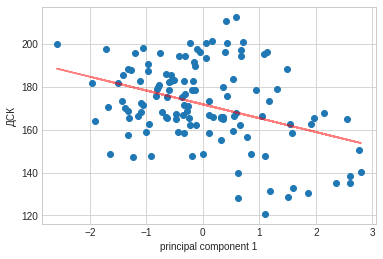

In [25]:
ox = X1['principal component 1']
oy = b0 + b1 * ox

plt.scatter(X1['principal component 1'], X1['ДСК'])
plt.plot(ox, oy, label="LR", color='red', alpha=0.5)

plt.xlabel('principal component 1')
plt.ylabel('ДСК')


Выводы: после применения PCA результаты линейной регрессии не изменились.

Из работы по **прогнозу цен на недвижимость**. 
Используем выборочные числовые признаки  с наличием корреляции для отработки навыка использавания PCA.

Построим матрицу корреляций, убедимся в наличии сильно положительной корреляции между признаками Social_1 и Social_2.
Построим модель линейной регрессии.
Объединим эти два признака в один. Еще раз построим матрицу и модель.

In [27]:
train_df = pd.read_csv('train.csv', sep=',')
train_df.head(4)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630


In [29]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [30]:
train_df.select_dtypes(include='int64').columns.tolist()

['Floor',
 'HouseYear',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1']

In [31]:
train_df.select_dtypes(include='float64').columns.tolist()

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'Ecology_1',
 'Healthcare_1',
 'Price']

In [32]:
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

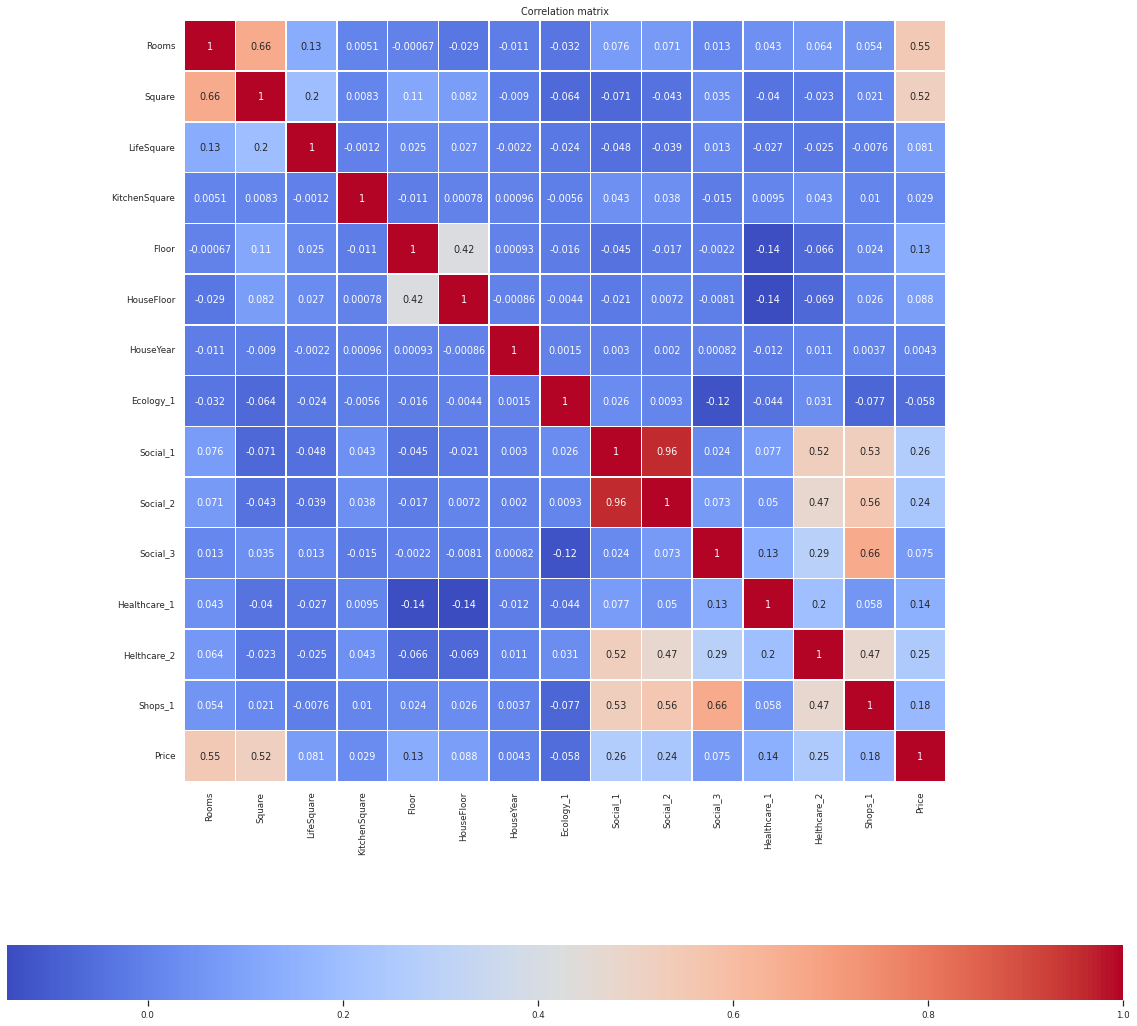

In [33]:
corrmatrix = train_df.corr()
plt.figure(figsize = (20,20))
sns.set(font_scale=0.8)
#corrmatrix[np.abs(corrmatrix) < 0.1] = 0

sns.heatmap(corrmatrix, annot=True, linewidths=.5, cmap='coolwarm', square=True, cbar_kws= {'orientation': 'horizontal'})

plt.title('Correlation matrix')
plt.show()

In [34]:
train_df['LifeSquare_nan'] = train_df['LifeSquare'].isna() * 1

condition = (train_df['LifeSquare'].isna()) \
             & (~train_df['Square'].isna()) \
             & (~train_df['KitchenSquare'].isna())
        
train_df.loc[condition, 'LifeSquare'] = train_df.loc[condition, 'Square'] \
                                            - train_df.loc[condition, 'KitchenSquare'] - 3

In [35]:
x1 = train_df[['Floor',
 'HouseYear',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1','Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'Ecology_1',]].values

y = train_df['Price'].values

In [36]:
model1 = sm.OLS(y, x1)
results = model1.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              8045.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                        0.00
Time:                        09:31:07   Log-Likelihood:                     -1.2560e+05
No. Observations:               10000   AIC:                                  2.512e+05
Df Residuals:                    9987   BIC:                                  2.513e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
from sklearn.preprocessing import StandardScaler
features = ['Social_1', 'Social_2']

# Separating out the features
X = train_df.loc[:, features].values

# Separating out the target
#y = df.loc[:,['Price']].values

# Standardizing the features
x = StandardScaler().fit_transform(X)

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents , columns = [' component social'])
principalDf

,component social
0,-0.950040
1,0.365156
2,0.319200
3,-1.853353
4,0.920310
...,...
9995,1.976778
9996,-1.748603
9997,-0.359553
9998,1.367961


In [53]:
pca.explained_variance_ratio_

array([0.97799423])

In [43]:
train_df['component social'] = principalDf
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,component social
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,11,3097,0,NaN,0,0,B,305018.871089,1,-0.950040
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,30,6207,1,1183.0,1,0,B,177734.553407,0,0.365156
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,33,5261,0,240.0,3,1,B,282078.720850,0,0.319200
3,2352,1,1.0,40.409907,36.409907,1.0,10,22.0,1977,0.007122,...,1,264,0,NaN,0,1,B,168106.007630,1,-1.853353
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,NaN,0,6,B,343995.102962,0,0.920310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,52,10311,6,NaN,1,9,B,119367.455796,0,1.976778
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,2,629,1,NaN,0,0,A,199715.148807,0,-1.748603
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,20,4386,14,NaN,1,5,B,165953.912580,0,-0.359553
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,47,8004,3,125.0,3,5,B,171842.411855,0,1.367961


In [54]:
df_new = train_df.drop(['Social_1', 'Social_2'], axis=1)
df_new

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,component social
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,B,B,0,NaN,0,0,B,305018.871089,1,-0.950040
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,1,1183.0,1,0,B,177734.553407,0,0.365156
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,0,240.0,3,1,B,282078.720850,0,0.319200
3,2352,1,1.0,40.409907,36.409907,1.0,10,22.0,1977,0.007122,B,B,0,NaN,0,1,B,168106.007630,1,-1.853353
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,2,NaN,0,6,B,343995.102962,0,0.920310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,6,NaN,1,9,B,119367.455796,0,1.976778
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,1,NaN,0,0,A,199715.148807,0,-1.748603
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,14,NaN,1,5,B,165953.912580,0,-0.359553
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,3,125.0,3,5,B,171842.411855,0,1.367961


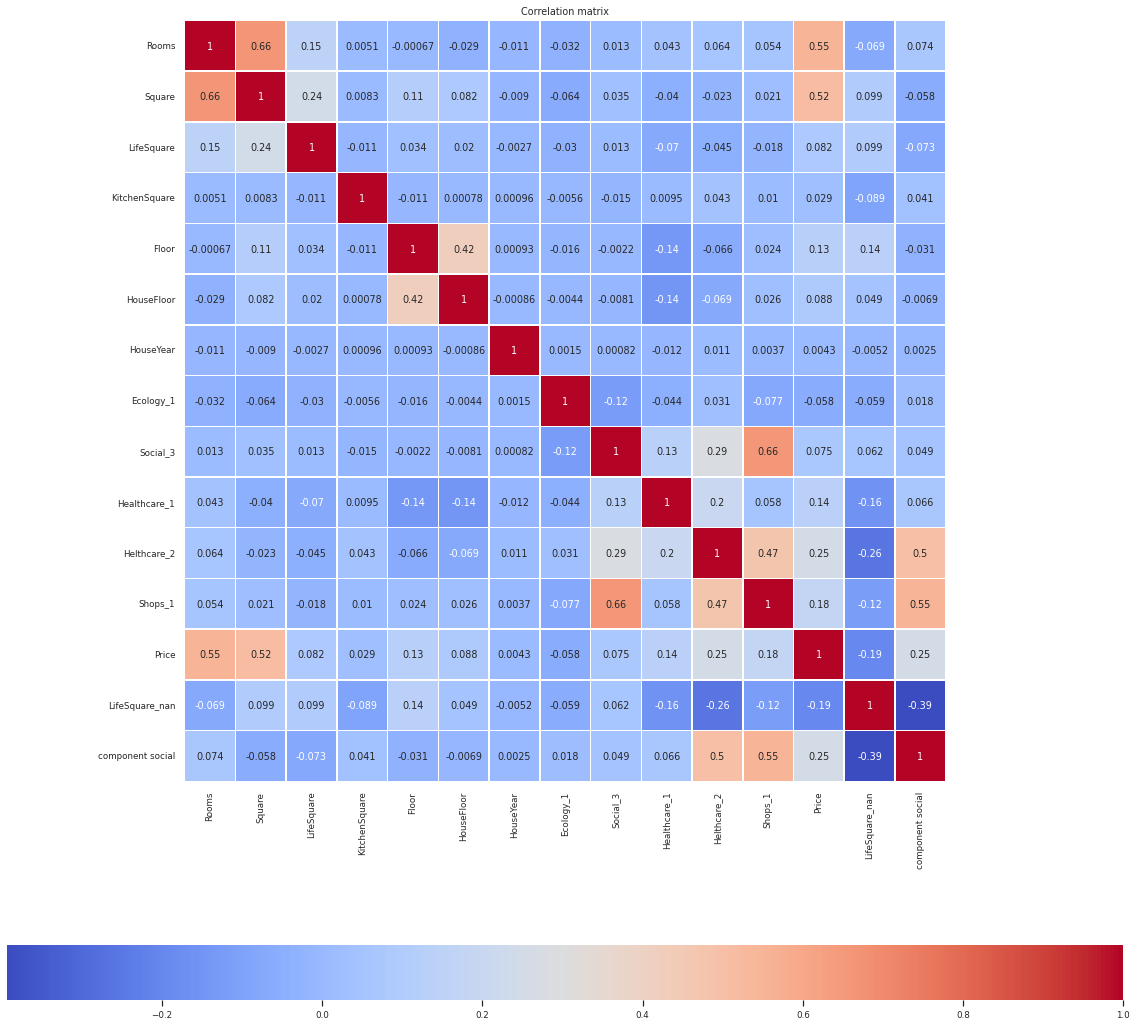

In [55]:
corrmatrix = df_new.corr()
plt.figure(figsize = (20,20))
sns.set(font_scale=0.8)
#corrmatrix[np.abs(corrmatrix) < 0.1] = 0

sns.heatmap(corrmatrix, annot=True, linewidths=.5, cmap='coolwarm', square=True, cbar_kws= {'orientation': 'horizontal'})

plt.title('Correlation matrix')
plt.show()

Корреляция нового признака с другими не превышает 55%

In [56]:
x2 = df_new[['Floor',
 'HouseYear',
 'Social_3',
 'Helthcare_2',
 'Shops_1','Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'Ecology_1', 'component social']].values

y = train_df['Price'].values

In [57]:
model2 = sm.OLS(y, x2)
results = model2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              8363.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                        0.00
Time:                        09:56:52   Log-Likelihood:                     -1.2578e+05
No. Observations:               10000   AIC:                                  2.516e+05
Df Residuals:                    9988   BIC:                                  2.517e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Результаты модели линейной регрессии незначительно ухудшились после использования PCA 0.909 vs 0.913. Вероятно, данный метод не слишком хорошее решения в данном случае, поскольку теряется большое количество информации. 